##### Numerical Computation: HW11

##### Andrew Pickner

I worked alone on this assignment.

---

In [1]:
# imports
import numpy as np
import quadpy as qp

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
f = lambda x: np.sin(2 * x) + np.cos(3 * x)

---

**(a)** Compute: $\int_{-1}^{1}(\text{sin}(2x)+\text{cos}(3x))\ dx$

We can initially break up the problem into two intervals, which might help a little down the road.

$\int \text{f}(x)\ dx\ + \int \text{g}(x)\ dx$

In our case, we have an $\text{f}(x)$ and a $\text{g}(x)$:

$\text{f}(x) = \text{sin}(2x)$

$\text{g}(x) = \text{cos}(3x)$

$\int_{-1}^{1}\text{sin}(2x)\ dx\ + \int_{-1}^{1}\text{cos}(3x)\ dx$

The anti-derivative of $\text{f}(x) = \text{sin}(2x)$ is $-\frac{1}{2}\text{cos}(2x)$. 

Similarly, the anti-derivative of $\text{g}(x) = \text{cos}(3x)$ is $\frac{1}{3}\text{sin}(3x)$. 

Thus, we'd need to compute $-\frac{1}{2}\text{cos}(2x)$ and $\frac{1}{3}\text{sin}(3x)$ both on the interval: $[-1,\ 1]$.

$-\frac{1}{2}\text{cos}(2x) |_{-1}^{1} = -\frac{1}{2}\text{cos}(2) - (-\frac{1}{2}\text{cos}(-2)) = 0$

We get zero above because of the double negation and the fact that $\text{cos}(2) = \text{cos}(-2)$.

$\frac{1}{3}\text{sin}(3x) |_{-1}^{1} = \frac{1}{3}\text{sin}(3) - (\frac{1}{3}\text{sin}(-3)) = \frac{2\text{sin}(3)}{3}\approx 0.0940800053732448147338298685387401865646221761681770561012550941$

The reason we get 2 of the same term in this case is because $-\text{sin}(3) = \text{sin}(-3)$.

*(According to Wolfram Alpha)*

And now, because our integration of $\text{g}(x)$ on the interval $[-1,\ 1]$ gave us zero, we can just take the integration of $\text{f}(x)$ on the interval $[-1,\ 1]$ as our answer.

$0.0940800053 + 0 = 0.0940800053$

Below, I'll calculate this number in python:

---

In [3]:
truth = (2 * np.sin(3)) / 3
print(truth)

0.0940800053732448


In [4]:
def trapezoid(f,a,b,n):
    # number of bins/subintervals
    xs = np.linspace(a,b,n+1)
    # size of bin/subinterval
    h = (b-a)/n
    # all of xs except the first and last item...
    i = xs[1:-1]
    # simpson's rule as given in lecture:
    return (h/2) * (f(a) + f(b) + (2 * sum(f(i))))

In [5]:
def simpsons(f,a,b,n):
    # this method requires an odd number of points to make an even number of subintervals?
    # it just requires three points for every subinterval, or 2m+1
    # you used '2m+1' in class which made sense initially, but as I dug deeper... 
    # This method converged well when I have this line left in, 
    # and when I commented it, the trapezoid rule outperformed it.
    if n % 2 == 1:
        n-=1
    xs    = np.linspace(a,b,n+1)
    h     = (b-a)/n
    ys    = f(xs)
    i   = ys[1:-1:2]
    ii = ys[2:-1:2]
    return (h/3) * (f(a) + f(b) + (4 * sum(i)) + (2 * sum(ii)))

In [6]:
def clen_curt(f,a,b,n):
    # given to us on piazza
    scheme = qp.c1.clenshaw_curtis(n)
    p, w = scheme.points, scheme.weights
    # we just sum over f at the points multiplied by the corresponding weight
    return sum(f(p)*w)

In [7]:
interval = -1, 1

In [8]:
def run_test(f, a, b, truth, k=20):
    ns           = []

    trap_results = []
    simp_results = []
    cc_results   = []
    
    trap_error   = []
    simp_error   = []
    cc_error     = []

    for i in range(1, k+1):
        n = (2 ** i) + 1
        ns.append(n)
        
        print("Number of points: {}".format(n))

        trap_results.append(trapezoid(f, a, b, n))
        simp_results.append(simpsons(f, a, b, n))
        cc_results.append(clen_curt(f, a, b, n))
        
        trap_error.append(abs(trap_results[i-1] - truth))
        simp_error.append(abs(simp_results[i-1] - truth))
        cc_error.append(abs(cc_results[i-1] - truth))
    
    print(trap_results)
    print(simp_results)
    print(cc_results)
    
    plt.loglog(ns, trap_error, '-o', label='$trap$')
    plt.loglog(ns, simp_error, '-x', label='$simp$')
    plt.loglog(ns, cc_error, '-o', label='$cc$')

    plt.xlabel("$n$", fontsize='xx-large')
    plt.ylabel("$error$", fontsize='xx-large')

    plt.legend()

Number of points: 3
Number of points: 5
Number of points: 9
Number of points: 17
Number of points: 33
Number of points: 65
Number of points: 129
Number of points: 257
Number of points: 513
Number of points: 1025
Number of points: 2049
Number of points: 4097
Number of points: 8193
Number of points: 16385
Number of points: 32769
Number of points: 65537
Number of points: 131073
Number of points: 262145
Number of points: 524289
Number of points: 1048577
[0.06040807675722274, 0.08250981753309494, 0.09056947383040143, 0.09310136272656408, 0.09382068889688311, 0.09401319351391355, 0.09406304424152495, 0.09407573214306611, 0.09407893290399579, 0.09407973673297998, 0.09407993814763753, 0.09407998855864055, 0.09408000116856949, 0.09408000432194755, 0.09408000511040525, 0.09408000530754014, 0.09408000535681513, 0.09408000536914896, 0.09408000537220185, 0.0940800053730068]
[0.673338335599703, 0.09765210335678876, 0.09425714855654801, 0.09409051693823425, 0.09408065408305855, 0.09408004579028685, 0

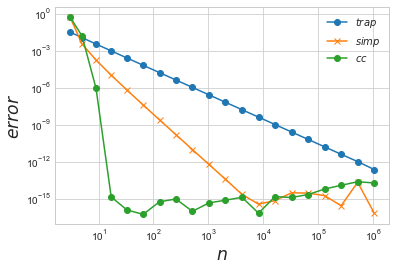

In [9]:
run_test(f, interval[0], interval[1], truth)

---

Well, for starters: it appears that the trapezoid rule is indeed second order, simpson's rule appears to be 4th order (and converge quicker than the trapezoid rule), and the clenshaw-curtis method converges the quickest (I was a little confused on the error for the clenshaw-curtis method from lecture). In fact, it looks as though the 4th ordered simpson's rule converges twice as fast as the second ordered trapezoid rule (which makes perfect intuitive sense). I just got discouraged last assignment where we were supposed to find the slope of this line (but mine seemed way off).

As for asymptotic regime: the trapezoid method seems to improve over the entire set of $n$'s I threw at it. Where simpson's rule and the clenshaw-curtis method both appear to get a little jumpy as $n$ gets really large. I'd say once $n>100$ for the clenshaw-curtis rule begins to exhibit some interesting behavior, and when $n>10,000$ simpson's rule does the same.

---

In [10]:
f2 = lambda x: np.sign(x + 0.2) + 1

**(a)** Compute: $\int_{-1}^{1}(\text{sign}(x + 0.2)+1\ dx$

So from $[-1, -0.2)$ our integral would be equal to $0$, because the sign function would be returning $-1$ (and we'd just add $1$ to that). So now, to solve the remaining part of our integral, we need to find the length of the subinterval that produces a positive value from the sign function, and multiply this length by 2 to get the area because we are adding $1$ to the sign function result. Thus, we get $2\cdot 1-(-0.2) = 2 \cdot 1.2 = \boxed{2.4}$

In [11]:
truth2 = 2.4

Number of points: 3
Number of points: 5
Number of points: 9
Number of points: 17
Number of points: 33
Number of points: 65
Number of points: 129
Number of points: 257
Number of points: 513
Number of points: 1025
Number of points: 2049
Number of points: 4097
Number of points: 8193
Number of points: 16385
Number of points: 32769
Number of points: 65537
Number of points: 131073
Number of points: 262145
Number of points: 524289
Number of points: 1048577
[2.0, 2.8000000000000003, 2.444444444444444, 2.4705882352941178, 2.3636363636363638, 2.430769230769231, 2.4031007751937983, 2.404669260700389, 2.39766081871345, 2.401951219512195, 2.4001952171791117, 2.400292897241884, 2.399853533504211, 2.400122062862374, 2.400012206658732, 2.4000183102674826, 2.3999908447964113, 2.4000076293654278, 2.400000762937998, 2.400001144408088]
[3.333333333333333, 2.333333333333333, 2.1666666666666665, 2.4166666666666665, 2.458333333333333, 2.395833333333333, 2.3854166666666665, 2.4010416666666665, 2.4036458333333

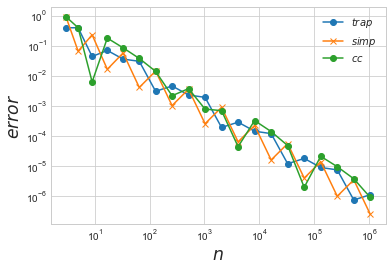

In [12]:
run_test(f2, interval[0], interval[1], truth2)

---

Well, it seems as though the stability is gone. Although I could reason through an answer for the integral (and check this answer using Desmos), I'm not entirely convinced this is an integratable function. Maybe it is, but its the fact that there's a jump in the graph indicates a potential reason why our error oscillates. 

---